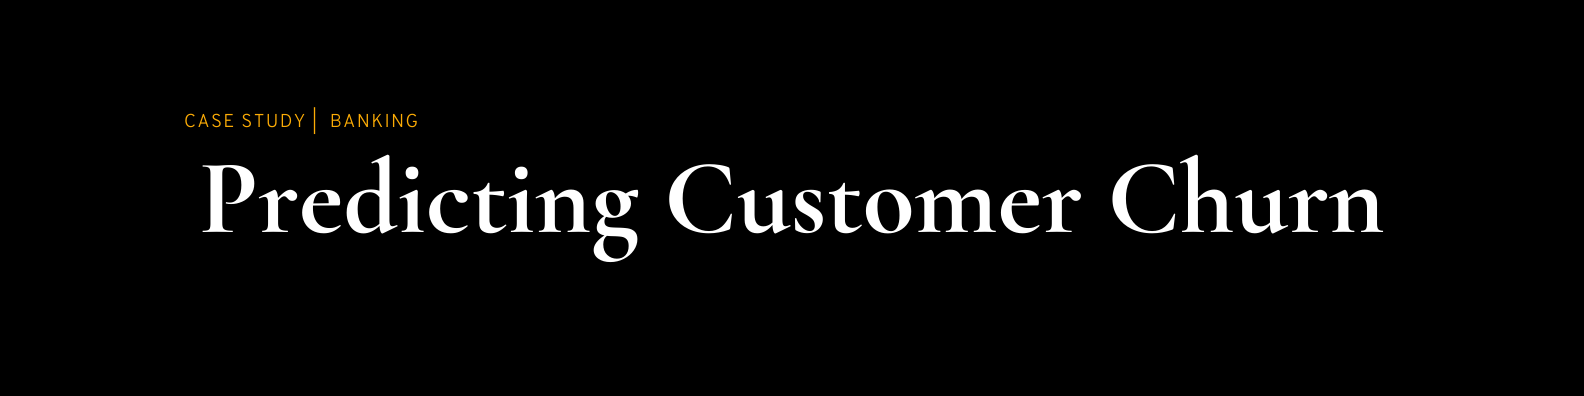

##### To see more case studies, view my machine learning portfolio [here](https://github.com/rgoubault/machine-learning-portfolio).

##### Author: Rainier Goubault | [LinkedIn](https://www.linkedin.com/in/rainiergoubault/)

# Introduction:

## What is churn?
Churn is defined as when customers discontinue doing business with a company.

## Why is churn important?
Most companies have a large number of customers and can't afford to devote much time and resources for individual customer retention. However, if a company could forecast which customers are most likely to leave ahead of time, it could focus its customer rentention efforts on these 'high-risk' churn customers. As a result, by addressing customer churn, these companies may not only preserve their market position, but also grow and thrive. A company key focus for success is reducing client attrition and implementing an effective retention strategy.

# Business Objective:

A financial institution, hereby known as BankCo., provided select, historical data on 10,000 customers including an indicator as the whether each customer churned. After analyzing the data, we see that BankCo. has a churn problem as 20.4% of it's customers churned. BankCo. has contracted me on a project to build a predictive model that meets the following business requirements:

1. Identify and visualize which factors contribute to customer churn.
2. Build a re-usable prediction model pipeline to classify customer churn risk - whether a customer will churn or not, thus making it easier for the bank to target these 'high-risk' customers as a part of its customer rentention efforts.


# Executive Summary:

After analyzing and transforming the data, we optimized several classification models. Each model was trained on 80% of the historical data and then asked to predict churn scores on the remaining 20% test data. Each model was compared with the previous best model, with Gradient Boosting model performing the best.


### Best Model Summary:

**Target Variable:** 

    - 'Exited'


**Model:**

    - Gradient Boosting 


**Parameters:**
    
    - 'subsample': 0.4
    - 'n_estimators': 923
    - 'max_depth': 3
    - 'learning_rate': 0.004977023564332114
    - 'threshold': 0.29071803852889666


**Key Metrics:**
    
    - Mean CV ROC-AUC score: 0.857
    - ROC-AUC test score: 0.783
    - Precision test score: 0.624
    - Recall test score: 0.669
    - F1 test score: 0.646
    
    
    
***This model will be socialized with BankCo. and refined based on feedback before moving towards deployment.***

# Gather the Data

##### The data used  was sourced from [here](https://www.kaggle.com/santoshd3/bank-customers)

### Load Libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from plotly.offline import iplot
from plotly.subplots import make_subplots

# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


from xgboost import XGBClassifier
from xgboost import plot_importance

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_curve, plot_roc_curve, make_scorer

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

cf.go_offline()

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

# Set pipeline display options
from sklearn import set_config
set_config(display='diagram')
set_config(print_changed_only=False)

%load_ext watermark

# Check the version history of libraries imported
print('\nAll librarires have been loaded!')
print('\nLibraries Version History:\n')
%watermark -iv


All librarires have been loaded!

Libraries Version History:

pandas    : 1.3.4
json      : 2.0.9
matplotlib: 3.5.0
numpy     : 1.19.5
seaborn   : 0.11.2
sklearn   : 1.0.1
scipy     : 1.7.3
cufflinks : 0.17.3
plotly    : 5.4.0



### Import the Data

In [2]:
raw_data = pd.read_csv('../02-data/customer-churn-bank-rawdata.csv')
df = raw_data.copy()
print('\nThe data has been successfully imported!')


The data has been successfully imported!


# Exploratory Data Analysis and Visualization

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


    - The data contains 10,000 entries (i.e. rows). Each entry represents a unique customer.
    - The data contains 14 features (i.e. columns). Each feature represents a attribute about the customer.
    - The data contains no null (missing) values. We'll confirm this during EDA.
    - The data contains 11 numerical features and 3 categorical features.
    - 'Exited' feature is the target variable, indicating whether a customer was retained or churned.

In [5]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

### Duplicate Values

In [6]:
# Check for duplicate customers
dups = df[df.duplicated(subset=['customerid'])==True]
print(f'{dups.shape[0]} duplicate values found')

0 duplicate values found


### Constant & Unique Values

In [7]:
df.nunique()

rownumber          10000
customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

    - The data does not contain any features with constant values. (# of unique = 1)
    - The data does contain 3 features ('rownumber', 'customerid') with all unique values. They are unique 
      to each customer and thus are irrelevant and will be dropped from the dataset.
    - The 'surname' feature is also unique to each customer and therefore irrelevant and will be dropped.

### Drop Irrelevant Features

In [8]:
feats_to_drop = ['rownumber', 'customerid', 'surname']
df.drop(feats_to_drop, axis=1, inplace=True)
print(f'Irrelevant features were dropped from the data!')

Irrelevant features were dropped from the data!


### Missing Values

In [9]:
df.isna().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

    - The data doesn't have any null (missing) values.

# Target Feature

In [10]:
target = df['exited'].to_frame()

In [11]:
target.count()

exited    10000
dtype: int64

In [12]:
target_vcounts = df['exited'].value_counts().to_frame()
target_vcounts

exited
0    7963
1    2037

**Most customers (7,963), as denoted by '0' were retained (i.e. stayed with the BankCo.), while 2,037 customers churned (i.e. exited and stopped duing business with BankCo.)**

In [13]:
target.iplot(kind='hist', bargap=0.1, title='Churn Distribution')

**Even though most customers stay with BankCo., the company is dealing with a 20.4% customer churn rate.**

In [14]:
names = ['Retained', 'Churned']
fig = px.pie(target_vcounts, names=names, values='exited', 
             title='<b>Churn Distribution<b>')
fig


# Numerical Features

In [15]:
# Get numerical features
numerical = df.drop('exited', axis=1).select_dtypes('number').columns.tolist()

In [16]:
# Get info about numerical features
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   tenure           10000 non-null  int64  
 3   balance          10000 non-null  float64
 4   numofproducts    10000 non-null  int64  
 5   hascrcard        10000 non-null  int64  
 6   isactivemember   10000 non-null  int64  
 7   estimatedsalary  10000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [17]:
df[numerical].head()

creditscore  age  tenure    balance  numofproducts  hascrcard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   isactivemember  estimatedsalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10

## Univariate Analysis

###### Distribution

In [18]:
df[numerical].iplot(kind='histogram', subplots=True, bins=50, dimensions=(1000, 1000),
                    title='<b>Histogram Distribution of Numerical Features<b>')

###### Statistical Summary

In [19]:
df[numerical].describe().T.style.background_gradient(subset=['count','mean','min','50%','max'], cmap='RdPu').format('{:.2f}')

### Summary of Numerical Features Distribution

    - 'creditscore': The distribution is clipped. The min credit score of a customer starts at 350 while the max 
       ends at 850. The average customer creditscore is 650.
    - 'age': The distribution is quite wide. The youngest customers is 18, whereas the oldest is 92. The 
       average customer age is 39.
    - 'tenure': The range of distribution is between 0 and 10. In general, the average customer tenure is 5 years,
       with 75% of customer staying for at least 3 years.
    - 'balance': The average customer balance is 76K. Worryingly, a customer has a max balance of 250K, 3.3 times 
       the mean customer balance. Is this an outlier?
    - 'numofproducts': The range of is between 1 and 4. On average, customers have 1.5 products, with 25% having
       atleast 2.
    - 'hascrcard': Most customers (71%) have a credit card. 
    - 'isactivememeber': Roughly even balance between active and non-active members with 52% of customers being 
       active members.
    - 'estimatedsalary': The average estimated customer salary is 100K. Worryingly, a customer has a min estimated
       salary of 11.58. Is this possible? Also, note a customer has a max estimated salary of almost 200K, 2 times 
       the mean estimated customer salary.

## Bivariate Analysis

**Let's visualize the influence of numerical features on the target variable.**

###### Distribution

In [20]:
for feature in df[numerical]:
    fig = px.box(df, x='exited', y=feature,
                 title=f'<b>{feature} distribution by churn<b>')
    fig.show()

In [21]:
for value, feature in enumerate(df[numerical]):
    fig = px.histogram(df[feature], x=feature, color=df['exited'], barmode='group',
                       title=f'<b>{feature} by churn<b>')
    fig.show()

###### Statistical Summary

In [22]:
print('\nStatistical summary of the numerical features by churning status:')
df.groupby('exited')[numerical].describe().T


Statistical summary of the numerical features by churning status:


exited                             0              1
creditscore     count    7963.000000    2037.000000
                mean      651.853196     645.351497
                std        95.653837     100.321503
                min       405.000000     350.000000
                25%       585.000000     578.000000
                50%       653.000000     646.000000
                75%       718.000000     716.000000
                max       850.000000     850.000000
age             count    7963.000000    2037.000000
                mean       37.408389      44.837997
                std        10.125363       9.761562
                min        18.000000      18.000000
                25%        31.000000      38.000000
                50%        36.000000      45.000000
                75%        41.000000      51.000000
                max        92.000000      84.000000
tenure          count    7963.000000    2037.000000
                mean        5.033279       4.932744
                std         2.880658       2.936106
                min         0.000000       0.000000
                25%         3.000000       2.000000
                50%         5.000000       5.000000
                75%         7.000000       8.000000
                max        10.000000      10.000000
balance         count    7963.000000    2037.000000
                mean    72745.296779   91108.539337
                std     62848.040701   58360.794816
                min         0.000000       0.000000
                25%         0.000000   38340.020000
                50%     92072.680000  109349.290000
                75%    126410.280000  131433.330000
                max    221532.800000  250898.090000
numofproducts   count    7963.000000    2037.000000
                mean        1.544267       1.475209
                std         0.509536       0.801521
                min         1.000000       1.000000
                25%         1.000000       1.000000
                50%         2.000000       1.000000
                75%         2.000000       2.000000
                max         3.000000       4.000000
hascrcard       count    7963.000000    2037.000000
                mean        0.707146       0.699067
                std         0.455101       0.458776
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         1.000000       1.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000
isactivemember  count    7963.000000    2037.000000
                mean        0.554565       0.360825
                std         0.497045       0.480358
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         1.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000
estimatedsalary count    7963.000000    2037.000000
                mean    99738.391772  101465.677531
                std     57405.586966   57912.418071
                min        90.070000      11.580000
                25%     50783.490000   51907.720000
                50%     99645.040000  102460.840000
                75%    148609.955000  152422.910000
                max    199992.480000  199808.100000

### Summary of Numerical Features Influence on the Target Variable

    - 'creditscore': Customers credit score doesn't seem to impact churn.
    - 'age': On average, older customers churn more than younger customers.
    - 'tenure': Customers tenure doesn't seem to impact churn.
    - 'balance': Customers with larger balances churn more.
    - 'numofproducts': The number of products a customers has doesn't seem to impact churn.
    - 'hascrcard': Customers with credit cards churn more. As we saw above, a majority of customers have a credit 
       card so this behaviour is not a-typical.
    - 'isactivemember': Non-active members churn more.
    - 'estimatedsalary': Customers estimated salary doesn't seem to impact churn.

## Relationships

###### Correlation Matrix + Heatmap

In [23]:
numerical_target = df.select_dtypes('number').columns
numerical_target

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

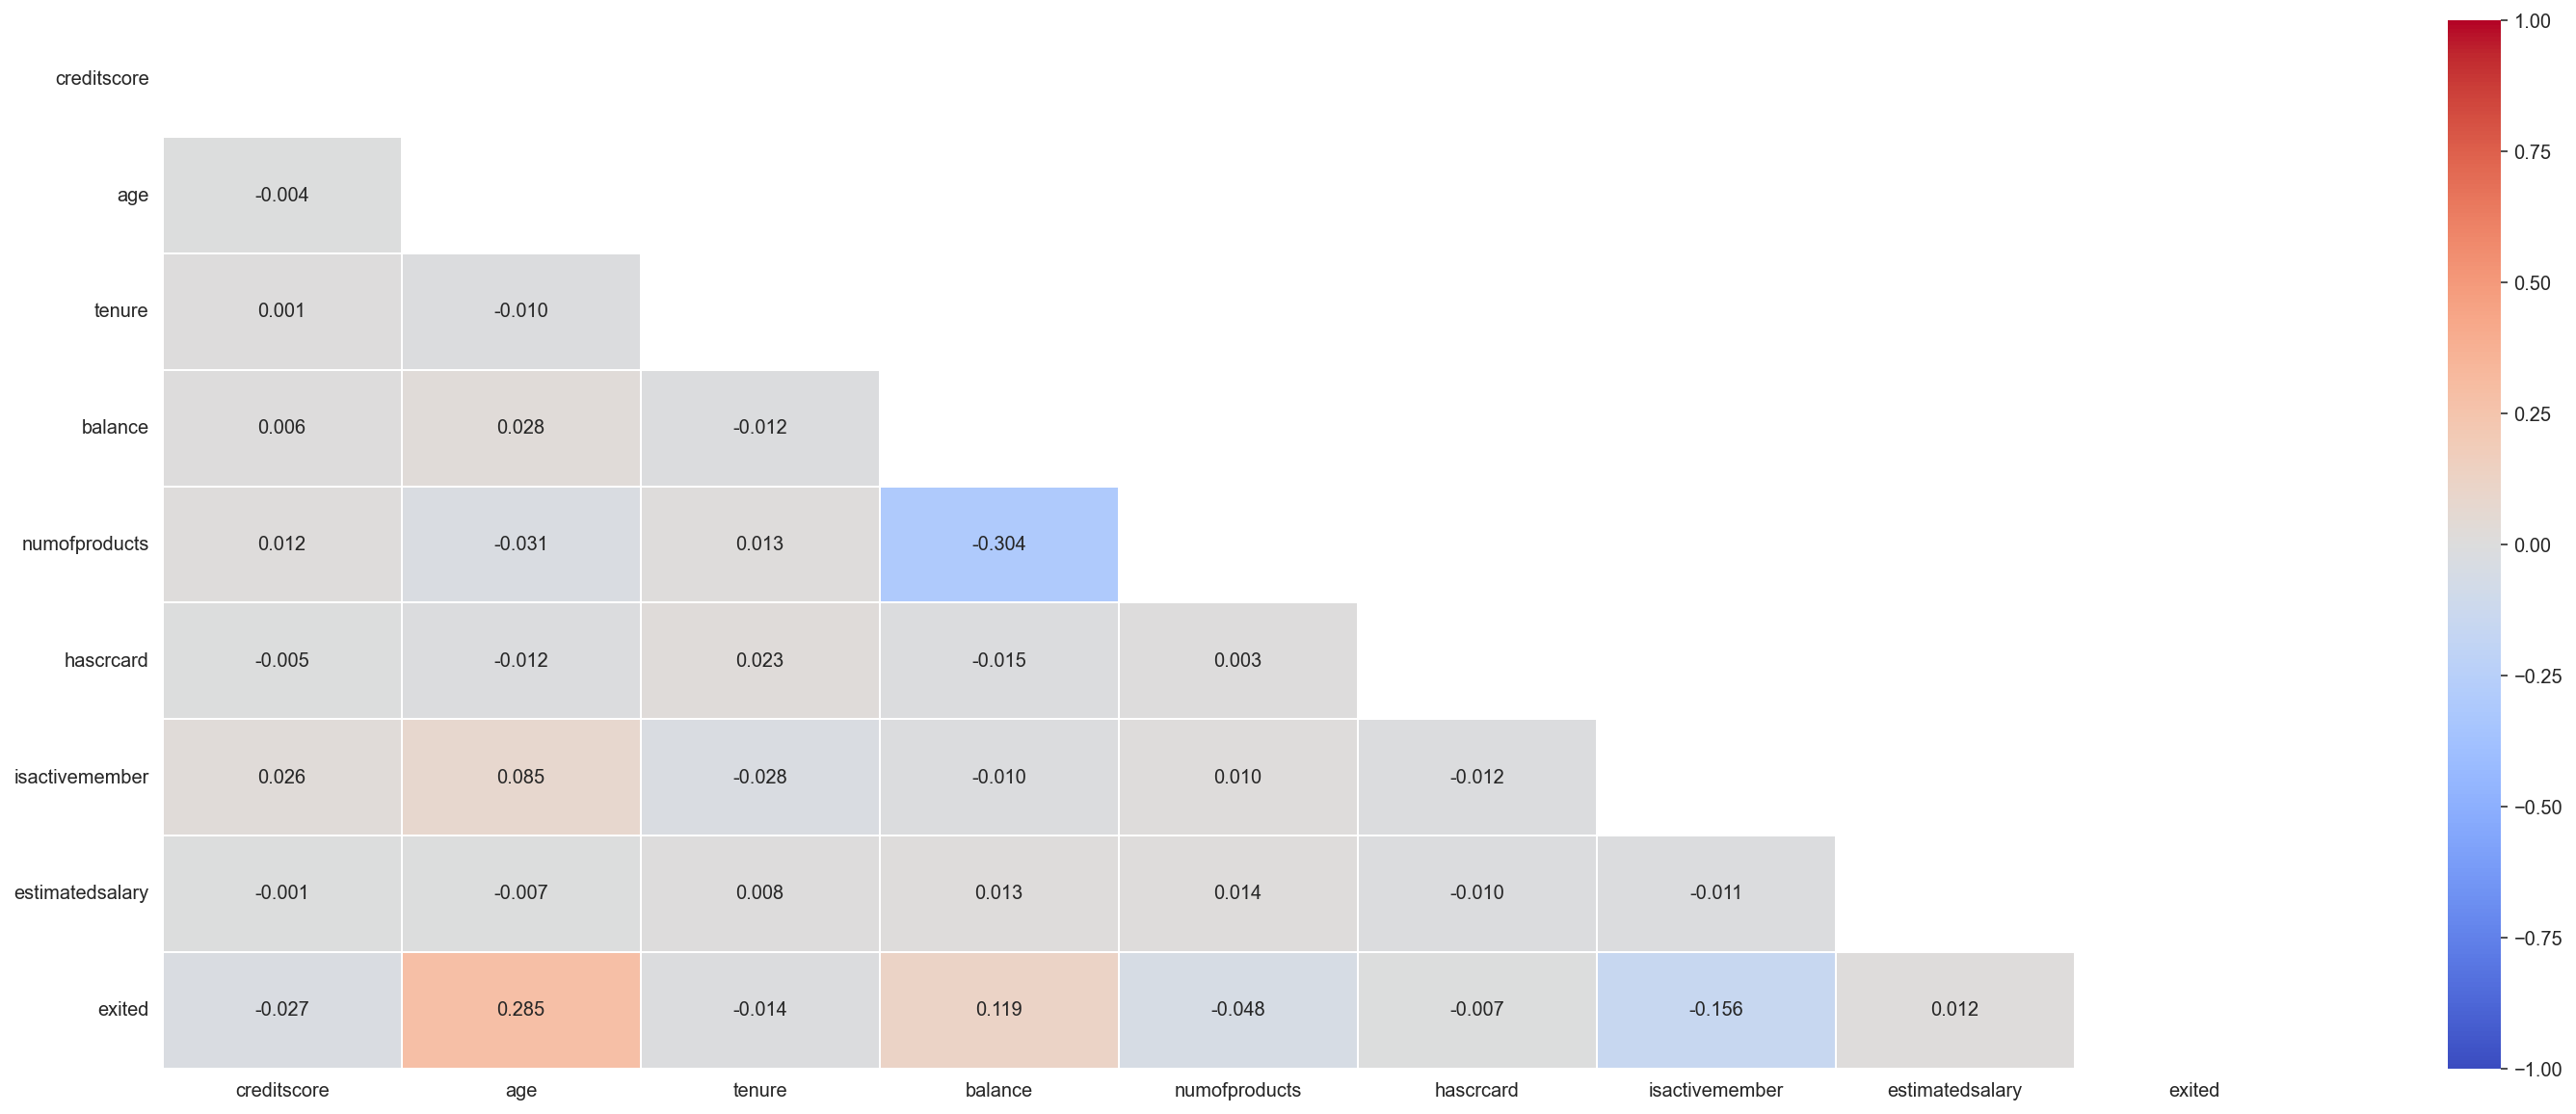

In [24]:
plt.figure(figsize=(25, 10))

corr_matrix = df[numerical_target].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

### Summary of Numerical Features Relationships

    - Overall, weak levels of correlation between numerical features 
    - Also, weak levels of correlation between numerical features and the target feature
    - Features - 'creditscore', 'tenure' and 'numofproducts' has a negative correlation with the target feature   

# Categorical Features

In [25]:
# Get categorical features
categorical = df.drop('exited', axis=1).select_dtypes('object').columns.tolist()

In [26]:
# Get info about categorical features
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   geography  10000 non-null  object
 1   gender     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [27]:
df[categorical].head()

geography  gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

## Univariate Analysis

###### Unique Values

In [28]:
for feature in df[categorical]:
    print(f'\n{feature} feature has {df[feature].nunique()} unique values.')
    print(f'{df[feature].unique()}\n')
    print('-' * 75)


geography feature has 3 unique values.
['France' 'Spain' 'Germany']

---------------------------------------------------------------------------

gender feature has 2 unique values.
['Female' 'Male']

---------------------------------------------------------------------------


    - The categorical features doesn't have high cardinality.

###### Distribution

In [29]:
fig = df[categorical].iplot(kind='hist', subplots=True,
                            title='<b>Histogram Distribution of Categorical Features<b>')
fig

###### Statistical Summary

In [30]:
df[categorical].describe().T.style.background_gradient(subset=['count', 'unique','freq'], cmap='RdPu')

### Summary of Categorical Features Distribution

    - 'geography': Majority of customers are French (5,014), then German (2,509) and Spanish (2,477).
    - 'gender': There are more male customers (5,457) then female customers (4,543).

## Bivariate Analysis

**Let's visualize the influence of categorical features on the target variable.**

###### Distribution

In [31]:
for value, feature in enumerate(df[categorical]):
    fig = px.histogram(df[feature], x=feature, color=df['exited'], barmode='group', 
                       title=f'<b>{feature} by churn<b>')
    fig.show()

###### Statistical Summary

In [32]:
print('\nStatistical summary of the categorical features by churning status:')
df.groupby('exited')[categorical].describe(exclude='number').T


Statistical summary of the categorical features by churning status:


exited                 0        1
geography count     7963     2037
          unique       3        3
          top     France  Germany
          freq      4204      814
gender    count     7963     2037
          unique       2        2
          top       Male   Female
          freq      4559     1139

###### CrossTabs

In [33]:
for i, col in enumerate(df[categorical]):
    xtab = pd.crosstab(df[col], df['exited'], normalize=True, margins=True)
    print()
    print(xtab * 100)
    print()
    print('-' * 75)


exited         0      1     All
geography                      
France     42.04   8.10   50.14
Germany    16.95   8.14   25.09
Spain      20.64   4.13   24.77
All        79.63  20.37  100.00

---------------------------------------------------------------------------

exited      0      1     All
gender                      
Female  34.04  11.39   45.43
Male    45.59   8.98   54.57
All     79.63  20.37  100.00

---------------------------------------------------------------------------


### Summary of Categorical Features Influence on the Target Variable

    - 'geography': German customers are slightly more likely to churn, with a 8.14% churn rate, compared to French 
       or Spanish customers. Worryingly, almost a third (32.44%) of German customers churn compared with 16.15% 
       and 16.67% for French and Spanish customers respectively.
    - 'gender': Female customers churn more than male customers with a 11.39% churn rate.

## Relationship

###### Mutual Info Score

In [34]:
from sklearn.metrics import mutual_info_score

def cat_mut_inf(series):
    return mutual_info_score(series, df['exited']) 

cat_mut_info = df[categorical].apply(cat_mut_inf) 
cat_mut_info = cat_mut_info.sort_values(ascending=False).to_frame(name='Mutual Info Score') 
cat_mut_info

Mutual Info Score
geography           0.014017
gender              0.005652

# Modeling

### Metric Selection

***Note: The exact metric used and the threshold that our model needs to reach depends on the business need. We can tune the model to some extent to optimize for different metrics.*** 

As we saw during EDA, the target feature **'exited'** is imbalanced. For an imbalanced classification problem, there are a number of metrics to consider. We'll evaluate the model on **F1 metric** , a harmonic mean between precision and recall.

### Model Selection

We will try the following models:

**Linear Models**

- Logistic Regression
- Support Vector Classifier
- KNeighbors Classifer

**Tree Models**

- Decision Tree

**Ensemble Models**

- Random Forest
- AdaBoost Classifier
- Gradient Boosting Classifer
- History Gradient Boosting

**Boosting Models**

- XGBoost

# Data Preparation

In [35]:
df = raw_data.copy()
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [36]:
df.shape

(10000, 14)

In [37]:
df.columns = df.columns.str.lower()

## Feature Engineering

**We seek to add new features to the data that are likely to have an impact on the probability of churning.**

    1. 'balancesalaryratio': The ratio of customers bank 'balance' vs. customers 'estimatedsalary'.
    2. 'tenurebyage': 'tenure' is a function of 'age', so we'll standardize 'tenure' over 'age'.
    3. 'creditscorebyage': 'creditscore' by 'age' to  take into account credit behaviour by adult life.

In [38]:
df['balancesalaryratio'] = df['balance'] / df['estimatedsalary']
df['tenurebyage'] = df['tenure'] / df['age']
df['creditscorebyage'] = df['creditscore'] / df['age']

In [39]:
df.head()

rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  exited  balancesalaryratio  tenurebyage  creditscorebyage  
0        101348.88       1            0.000000     0.047619         14.738095  
1        112542.58       0            0.744677     0.024390         14.829268  
2        113931.57       1            1.401375     0.190476         11.952381  
3         93826.63       0            0.000000     0.025641         17.923077  
4         79084.10       0            1.587055     0.046512         19.767442

In [40]:
df.shape

(10000, 17)

## Split the data into train and test set

In [41]:
train, test = train_test_split(df, test_size=.10, random_state=999)

# Save train and test set to csv
train.to_csv('../02-data/customer-churn-bank-trainingset.csv', index=False)
test.to_csv('../02-data/customer-churn-bank-testingset.csv', index=False)
print('The train and test set were saved!\n')


print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)

The train and test set were saved!

The shape of the train set: (9000, 17)
The shape of the test set: (1000, 17)


## Parition the training set data into features (X) and target (y)

In [42]:
X = train.drop(['rownumber', 'customerid', 'surname', 'exited'], axis=1)
y = train['exited']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (9000, 13)
The shape of y: (9000,)


## Split into training and testing sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7200, 13) (1800, 13)
(7200,) (1800,)


##### Let's check that the target is stratified after splitting.

In [44]:
y_train.value_counts(normalize=True)

0    0.795
1    0.205
Name: exited, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

0    0.795
1    0.205
Name: exited, dtype: float64

## Data Preprocessing

In [46]:
# Define numerical features preprocessing 
std_scl = StandardScaler()
num_preprocessor = Pipeline([('scale', std_scl)])

# Define categorical features data preprocessing
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
cat_preprocessor = Pipeline([('encode', ohe)])

# Combine numerical and categorical preprocessing 
ct = ColumnTransformer([('numerical', num_preprocessor, selector(dtype_include='number')),
                        ('categorical', cat_preprocessor, selector(dtype_include='object'))])

In [47]:
ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numerical',
                                 Pipeline(memory=None,
                                          steps=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15ef53640>),
                                ('categorical',
                                 Pipeline(memory=None,
                                          steps=[('encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop='if_binary',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True))],
                                          verbose=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15ef53df0>)],
                  verbose=False, verbose_feature_names_out=True)

## Modeling with Defualt Parameters

In [48]:
%%time

models = []

models.append(("LR", LogisticRegression(random_state=999)))
models.append(("SVC", SVC(random_state=999)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier(random_state=999)))
models.append(("RF", RandomForestClassifier(random_state=999)))
models.append(("ADA", AdaBoostClassifier(random_state=999)))
models.append(("GB", GradientBoostingClassifier(random_state=999)))
models.append(("HGB", HistGradientBoostingClassifier(random_state=999)))
models.append(("XGB", XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=999)))


# evaluate each model in turn
results = []
names = []
f1_scores = []
precision_scores = []
recall_scores = []
rocauc_scores = []
accuracy_scores = []

for name, model in models:
    
    # Get and store model name
    names.append(name)
    
    # Instantiate model
    model_pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # Instantiate model evaluation strategy
    skfold = StratifiedKFold(n_splits=10, random_state=999, shuffle=True)
    metric = 'roc_auc'
    
    # Compute and append model F1 cv scores
    cv_results = cross_val_score(model_pipe, X_train, y_train, scoring=metric, cv=skfold, n_jobs=-1, error_score='raise')
    results.append(cv_results)
    
    # Compute model test metrics
    y_pred = model_pipe.fit(X_train, y_train).predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model test metrics
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    rocauc_scores.append(rocauc)
    accuracy_scores.append(accuracy)
    
    # Display model result
    print(f'\nModel: {name}\n')
    print(f'Model Parameters:\n{model}\n')
    print(f'{name} Mean CV ROC-AUC Score:\n{cv_results.mean():.3f}\n')
    print(f'Test Scores:')
    print(f'F1: {f1:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | ROC-AUC: {rocauc:.3f} | Accuracy: {accuracy:.3f}\n')
    print('-' * 100)


Model: LR

Model Parameters:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=999, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LR Mean CV ROC-AUC Score:
0.767

Test Scores:
F1: 0.367 | Precision: 0.738 | Recall: 0.244 | ROC-AUC: 0.611 | Accuracy: 0.827

----------------------------------------------------------------------------------------------------

Model: SVC

Model Parameters:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=999, shrinking=True, tol=0.001,
    verbose=False)

SVC Mean CV ROC-AUC Score:
0.814

Test Scores:
F1: 0.563 | Precision: 0.865 | Recall: 0.417 | ROC-AUC: 0.700 | Accuracy: 0.867

-------

**Let's examine the CV scores for each model.**

In [49]:
model_cv_results = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
model_mean_cvresults = pd.DataFrame(model_cv_results.mean()[:]).T
model_cv_results = pd.concat([model_cv_results, model_mean_cvresults])
model_cv_results = model_cv_results.set_axis(['1st CV', '2nd CV', '3rd CV', '4th CV', '5th CV', '6th CV', 
                                              '7th CV', '8th CV', '9th CV', '10th CV', 'Mean CV ROC-AUC']) 
model_cv_results.style.apply(lambda x: ['background: yellow' if x.name in ['Mean CV ROC-AUC'] else '' for i in x], 
                             axis=1).highlight_max(color = 'lightgreen', axis = 0)

In [50]:
model_cv_results.iplot(kind='box', boxpoints='all', title='CV ROC-AUC Scores by Default Model') 

In [51]:
mean_cvresults_df = pd.DataFrame(model_cv_results.mean(), columns=['Mean CV ROC-AUC'])
mean_cvresults_df.sort_values('Mean CV ROC-AUC', ascending=False).style.highlight_max(color='lightgreen')

In [52]:
mean_cvresults_df.sort_values('Mean CV ROC-AUC').iplot(kind='barh', title='Mean CV ROC-AUC Score by Default Model')

    - GB model achieves the best mean CV ROC-AUC score amongst all the models.

**Let's examine the test scores of each model.**

In [53]:
test_results = pd.DataFrame({'F1': f1_scores, 'Precision': precision_scores, 'Recall': recall_scores, 
                             'ROC-AUC': rocauc_scores, 'Accuracy': accuracy_scores}, index=names)

test_results.style.highlight_max(color = 'lightgreen', axis = 0)

     - F1: XGB model achieves the best F1 test score.
     - Precision: SVC model achieves the best Precision test score.
     - Recall: DT model achieves the best Recall test score.
     - ROC-AUC: Again, XGB model achieves the best ROC-AUC test score.
     - Accuracy: GB model achieves the best Accuracy score.

**Let's visualize the test scores for each model.**

In [54]:
for score in test_results.columns:
    test_results[score].sort_values().iplot(kind='barh', title=f'{score} Scores')

**From the above results, GB model seem well suited for the task.**

In [55]:
%%time

gb_pipe = Pipeline([('preprocessing', ct), 
                    ('model', GradientBoostingClassifier(random_state=999))])
                     
y_pred = gb_pipe.fit(X_train, y_train).predict(X_test)

print(f'Model Test Score:') 
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)} | F1: {f1_score(y_test, y_pred)}\n')


cv_results = cross_val_score(gb_pipe, X_train, y_train, scoring=metric, cv=skfold, n_jobs=-1, 
                             verbose=0, error_score='raise').mean()

print(f'Mean CV ROC-AUC Score: {cv_results}\n')

Model Test Score:
ROC-AUC: 0.7417719145744917 | F1: 0.631051752921536

Mean CV ROC-AUC Score: 0.8615494937017001

CPU times: user 1.39 s, sys: 25.5 ms, total: 1.42 s
Wall time: 4.91 s


### Feature Selection

**The next step will be to eliminate insignificant features to make the model more parsimonious.**

In [56]:
%%time

from sklearn.feature_selection import RFECV

gb_fs_pipe = Pipeline([('preprocessing', ct), 
                       ('feature_selection', RFECV(LogisticRegression())),
                       ('model', GradientBoostingClassifier(random_state=999))])

y_pred = gb_fs_pipe.fit(X_train, y_train).predict(X_test)

print(f'Model Test Score:') 
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)} | F1: {f1_score(y_test, y_pred)}\n')

cv_results = cross_val_score(gb_fs_pipe, X_train, y_train, scoring=metric, cv=skfold, n_jobs=-1, 
                             verbose=0, error_score='raise').mean()

print(f'Mean CV ROC-AUC Score: {cv_results}\n')

Model Test Score:
ROC-AUC: 0.723193741371376 | F1: 0.6010362694300518

Mean CV ROC-AUC Score: 0.8420307784906701

CPU times: user 5.4 s, sys: 723 ms, total: 6.13 s
Wall time: 8.05 s


    - The model performance did not improve with feature selection. We wont perform any feature selection.

### Model Tuning

In [57]:
%%time

gb_param_grid = {
    'model__n_estimators': np.arange(100, 1001),
    'model__max_depth': np.arange(1, 11),
    'model__subsample': [i/10.0 for i in np.arange(1, 11)],
    'model__learning_rate': np.logspace(-4, 0, 100)  
}


gb_randomsearch = RandomizedSearchCV(gb_pipe, param_distributions=gb_param_grid, n_iter=25, 
                                     scoring=metric, n_jobs=-1, cv=skfold, verbose=1, random_state=999, 
                                     error_score='raise', return_train_score=True)

gb_randomsearch.fit(X_train, y_train);

Fitting 10 folds for each of 25 candidates, totalling 250 fits
CPU times: user 6.94 s, sys: 182 ms, total: 7.13 s
Wall time: 7min 1s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numerical',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scale',
                                                                                                StandardScaler(copy=True,
                                                                                                               with_mean=Tr...
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000]),
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=999, refit=True,
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [58]:
y_pred = gb_randomsearch.best_estimator_.predict(X_test)
print(f'Model Test Score:') 
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)} | F1: {f1_score(y_test, y_pred)}\n')

Model Test Score:
ROC-AUC: 0.7333776482418912 | F1: 0.6198630136986301



In [59]:
print(f'Mean CV ROC-AUC Score: {gb_randomsearch.best_score_}')

Mean CV ROC-AUC Score: 0.8573652190565054


In [60]:
print(f'Best Model Parameters:\n{gb_randomsearch.best_params_}')

Best Model Parameters:
{'model__subsample': 0.4, 'model__n_estimators': 923, 'model__max_depth': 3, 'model__learning_rate': 0.004977023564332114}


In [61]:
print(f'Best model found:')
best_model = gb_randomsearch.best_estimator_
best_model

Best model found:


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15f4bfb20...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.004977023564332114,
                                            loss='deviance', max_depth=3,
                                            max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=923,
                                            n_iter_no_change=None,
                                            random_state=999, subsample=0.4,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

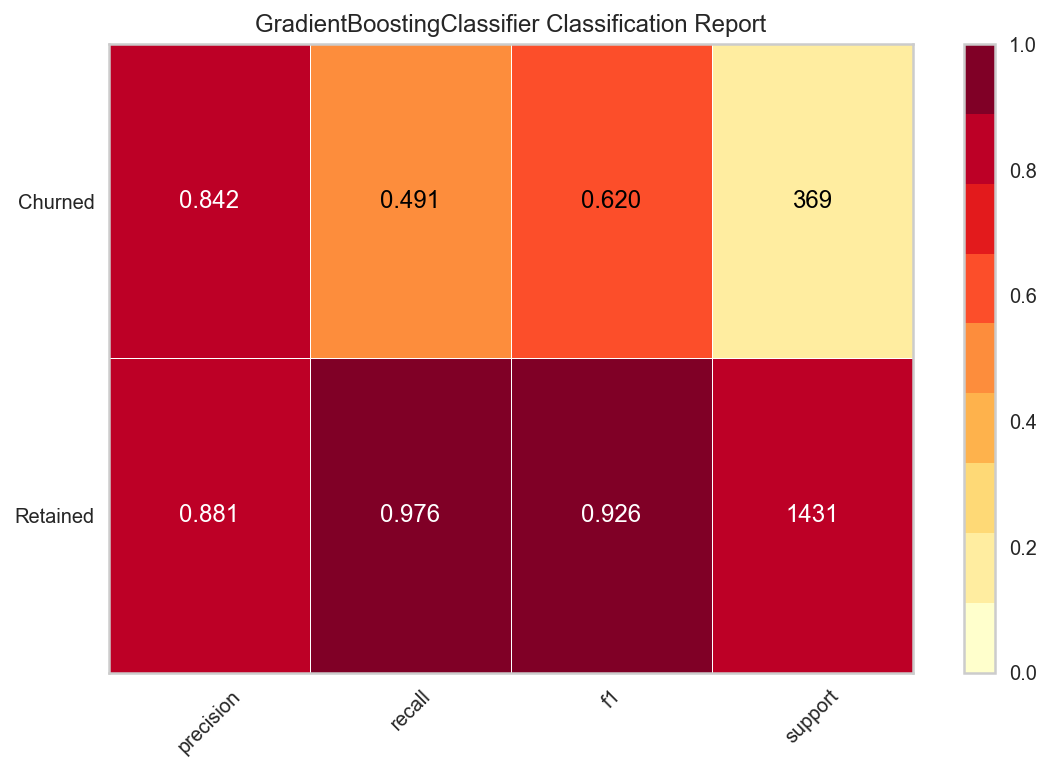

In [62]:
from yellowbrick.classifier import classification_report as cr
cr_viz = cr(best_model, X_train, y_train, X_test, y_test, classes=['Retained', 'Churned'], support=True)

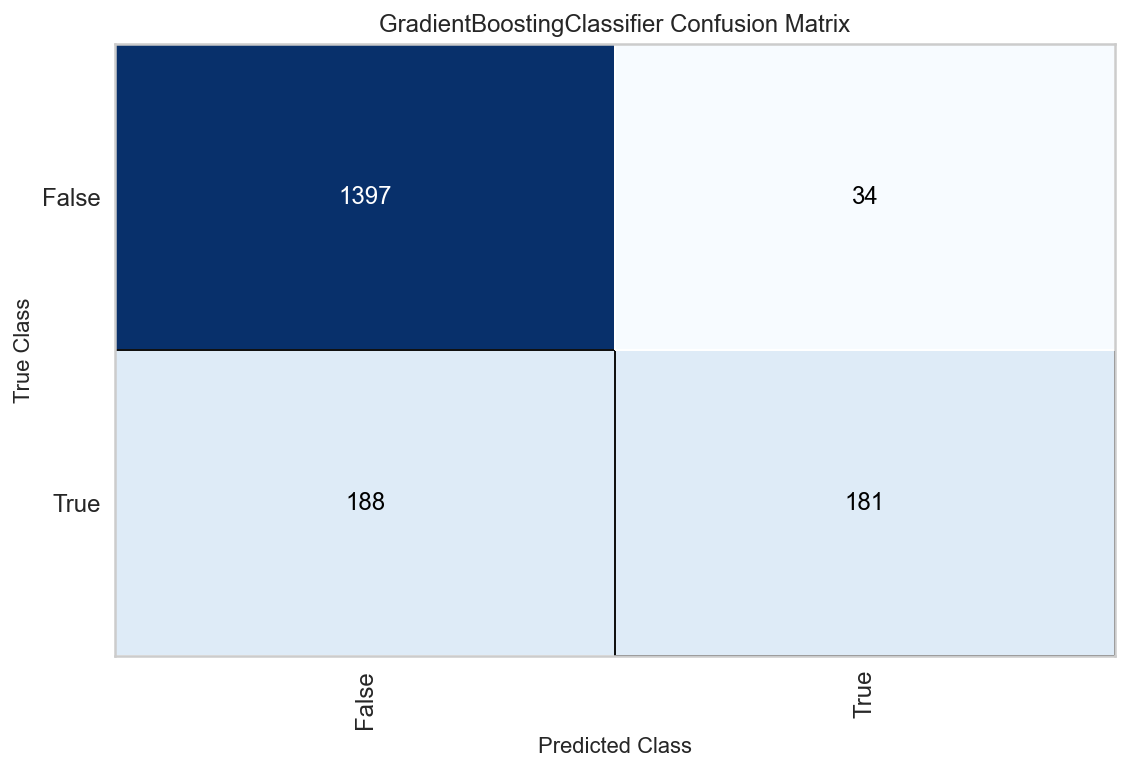

In [63]:
from yellowbrick.classifier import confusion_matrix as cm
cm_viz = cm(best_model, X_train, y_train, X_test, y_test, cmap='Blues', classes=['False', 'True'])

### Decision Threshold

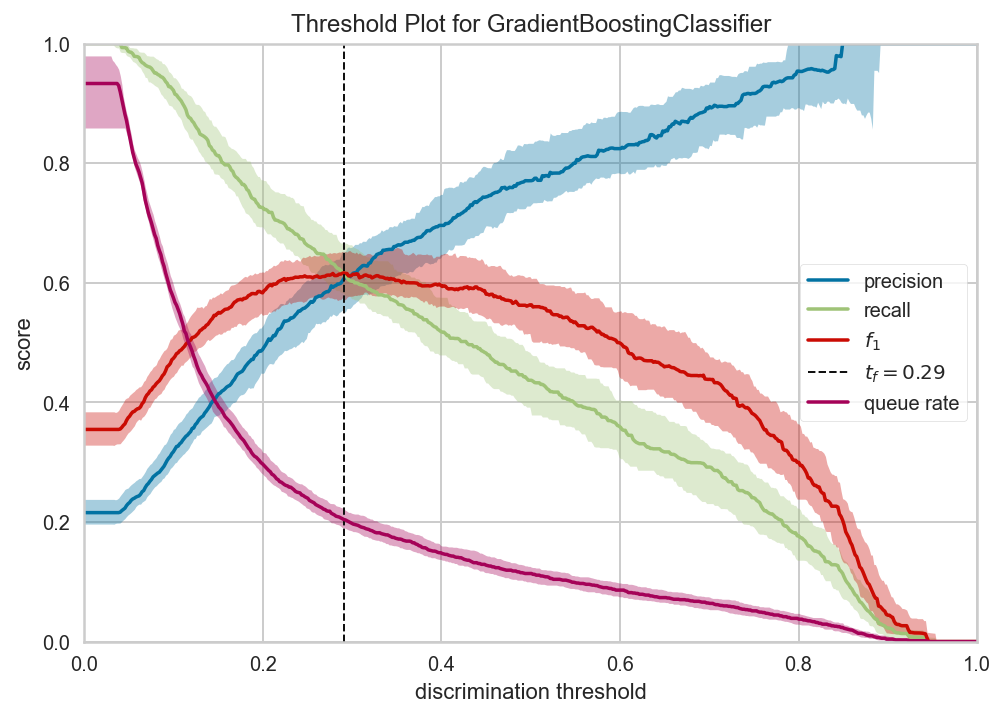

CPU times: user 4min 16s, sys: 2.43 s, total: 4min 18s
Wall time: 4min 21s


<AxesSubplot:title={'center':'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [64]:
%%time

from yellowbrick.classifier import DiscriminationThreshold as dt
dt_viz = dt(best_model, random_state=999, quantiles=np.array([0.1, 0.5, 0.9]))
dt_viz.fit(X_train, y_train)
dt_viz.show();

In [65]:
best_threshold = dt_viz.thresholds_[dt_viz.cv_scores_[dt_viz.argmax].argmax()]
best_threshold

0.29071803852889666

In [66]:
from sklego.meta import Thresholder
best_model = make_pipeline(*best_model[:-1], Thresholder(best_model[1], best_threshold))
best_model

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15f4b...
                                                              loss='deviance',
                                                              max_depth=3,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=923,
                                                              n_iter_no_change=None,
                                                              random_state=999,
                                                              subsample=0.4,
                                                              tol=0.0001,
                                                              validation_fraction=0.1,
                                                              verbose=0,
                                                              warm_start=False),
                             refit=False, threshold=0.29071803852889666))],
         verbose=False)

In [67]:
y_pred = best_model.fit(X_train, y_train).predict(X_test)
print(f'Model Test Score:') 
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)} | F1: {f1_score(y_test, y_pred)}\n')

Model Test Score:
ROC-AUC: 0.782626851425747 | F1: 0.6457516339869281



In [68]:
cv_results = cross_val_score(best_model, X_train, y_train, scoring=metric, cv=skfold, n_jobs=-1, 
                             verbose=0, error_score='raise').mean()

print(f'Mean CV ROC-AUC Score: {cv_results}')

Mean CV ROC-AUC Score: 0.8573652190565054


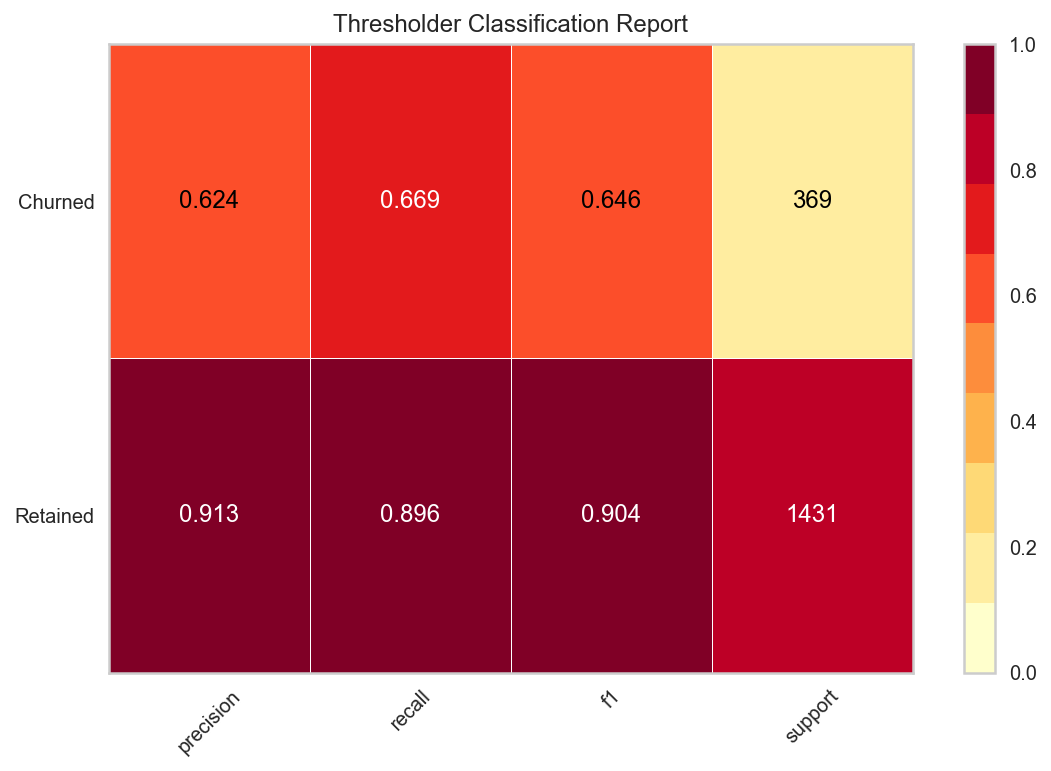

In [69]:
cr_viz = cr(best_model, X_train, y_train, X_test, y_test, classes=['Retained', 'Churned'], support=True)

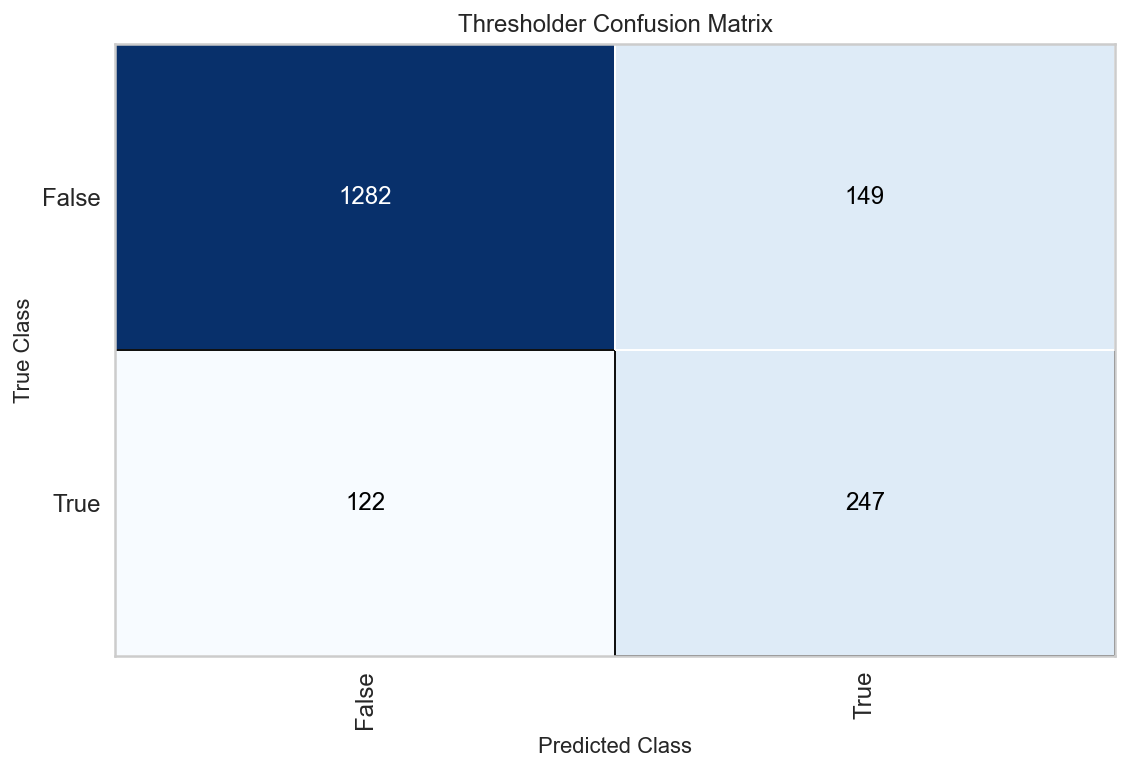

In [70]:
cm_viz = cm(best_model, X_train, y_train, X_test, y_test, cmap='Blues', classes=['False', 'True'])

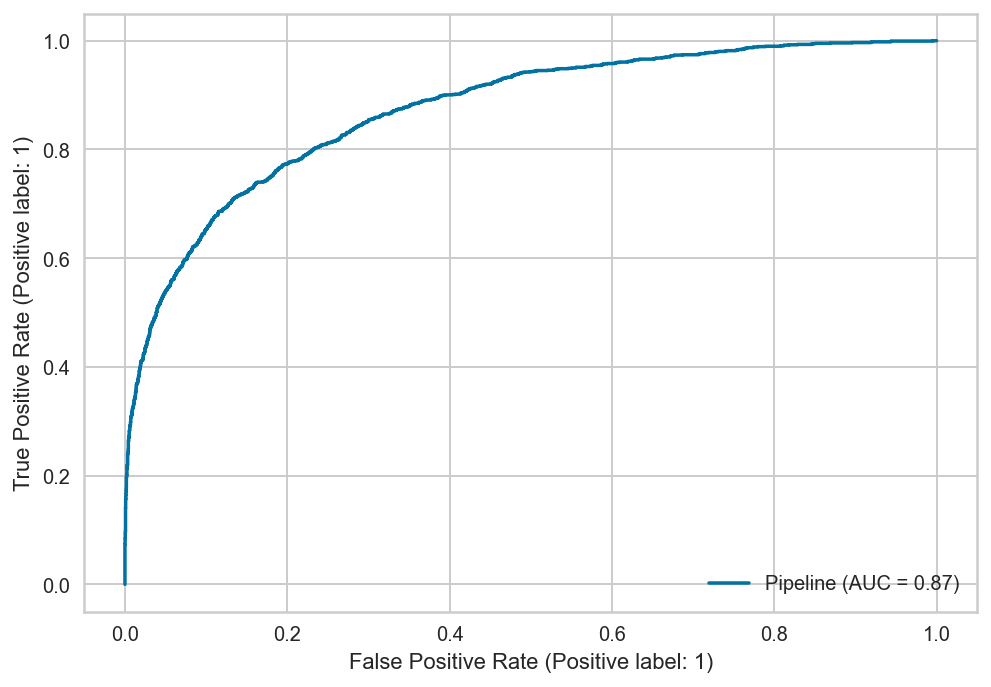

In [71]:
plot_roc_curve(best_model, X_train, y_train, response_method='auto');

## Conclusions

We have developed a resuable model pipeline, the optimized model is able to solve the business problem of predicting customer churn with given parameters. The model can be deployed and used to make predictions on new data.

Based on discussions with BankCo., the aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of most importance. Earlier during EDA, we noted that we had about 20.4% of churn, a recall greater than this baseline will already be an improvement, but we want to get as high as possible while also trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives. 

In our given study, the 'Gradient Boosting' model with the best parameters of RandomizedSearchCV achieved a mean CV ROC-AUC score of 0.857. The recall score of 0.669 on 1's means that the model is able to highlight 66.9% of all those who churn. The precision score of 0.624 means that out of all customers that the model think will churn, 62.4% do actually churn. The F1 score of 0.646 is the harmonic mean between precision and recall. The AUC score is 0.87 meaning that it can be considered as excellent since it's between 0.8 to 0.9, based on literature.

## Save Best Model

In [72]:
best_model

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15f4b...
                                                              loss='deviance',
                                                              max_depth=3,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=923,
                                                              n_iter_no_change=None,
                                                              random_state=999,
                                                              subsample=0.4,
                                                              tol=0.0001,
                                                              validation_fraction=0.1,
                                                              verbose=0,
                                                              warm_start=False),
                             refit=False, threshold=0.29071803852889666))],
         verbose=False)

In [73]:
# Fit best model on all data
best_model.fit(X, y);

In [74]:
import joblib
joblib.dump(best_model, '../03-model/customer-churn-bank-bestmodel-gbc-v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


## Deploy Model for Testing

###### Load the model

In [75]:
# Load model
model = joblib.load('../03-model/customer-churn-bank-bestmodel-gbc-v1.pkl')
model

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15fb3...
                                                              loss='deviance',
                                                              max_depth=3,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=923,
                                                              n_iter_no_change=None,
                                                              random_state=999,
                                                              subsample=0.4,
                                                              tol=0.0001,
                                                              validation_fraction=0.1,
                                                              verbose=0,
                                                              warm_start=False),
                             refit=False, threshold=0.29071803852889666))],
         verbose=False)

###### Import new data

In [76]:
# Import new data
new_data = pd.read_csv('../02-data/customer-churn-bank-testingset.csv')
new_data.head()

rownumber  customerid     surname  creditscore geography  gender  age  \
0       9032    15742323      Barese          541    France    Male   39   
1       3463    15713596   Ugochukwu          428    France  Female   62   
2       3864    15645095       Huang          674    France  Female   28   
3       1145    15694821       Hardy          765   Germany    Male   43   
4       2693    15736274  Prokhorova          751    France    Male   31   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       7       0.00              2          1               0   
1       1  107735.93              1          0               1   
2       3       0.00              1          1               0   
3       4  148962.76              1          0               1   
4       8       0.00              2          0               0   

   estimatedsalary  exited  balancesalaryratio  tenurebyage  creditscorebyage  
0         19823.02       0            0.000000     0.179487         13.871795  
1         58381.77       0            1.845369     0.016129          6.903226  
2         51536.99       0            0.000000     0.107143         24.071429  
3        173878.87       1            0.856704     0.093023         17.790698  
4         17550.49       0            0.000000     0.258065         24.225806

In [77]:
new_data.shape

(1000, 17)

In [78]:
X_new = new_data.drop(['rownumber', 'customerid', 'surname', 'exited'], axis=1)
y_true = new_data['exited']
print('The shape of X:', X_new.shape)
print('The shape of y:', y_true.shape)

The shape of X: (1000, 13)
The shape of y: (1000,)


###### Make predictions

In [79]:
model_pred = model.predict(X_new)

###### Evaluate predictions

In [80]:
comparison = model_pred == y_true
np.unique(comparison, return_counts=True)

(array([False,  True]), array([154, 846]))

    - Out of 1000, the model correctly predicted 846 (84.6%) predictions, while 154 (15.4%) predictions the 
      model incorrectly predicted.

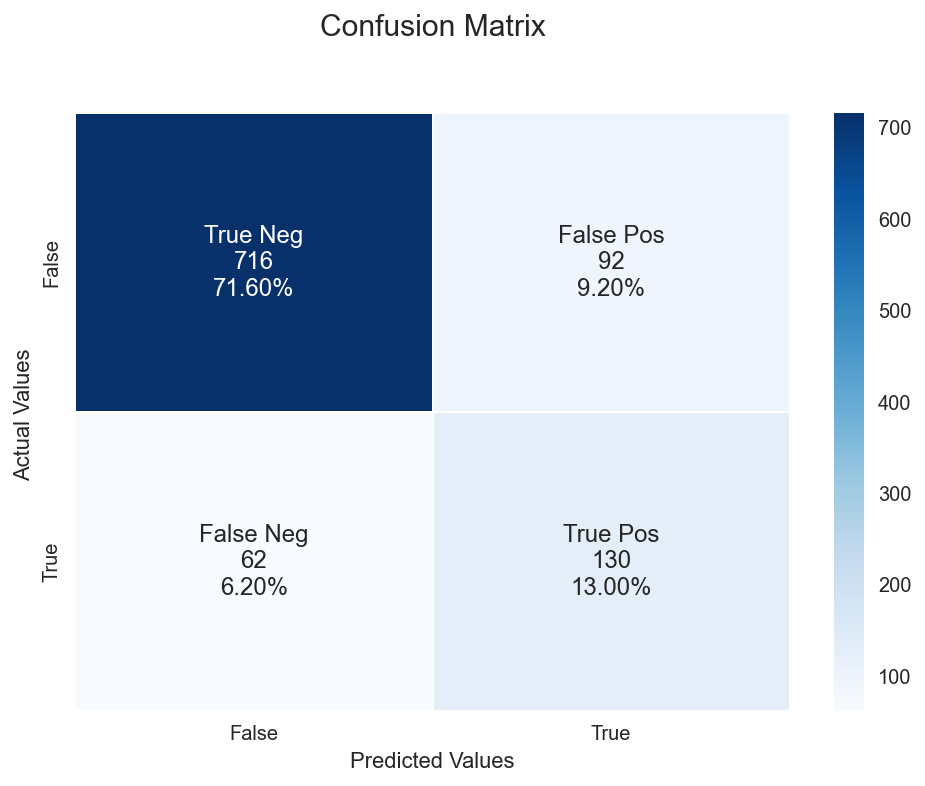

In [81]:
cm = confusion_matrix(y_true, model_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

From the confusion matrix we can see that:

    - There are total of 716 + 92 = 808 actual non-churn values, and the model predicts 716 of them as non churn
      and 92 of them as churn.
    - While there are 62 + 130 = 192 actual churn values, and the model predicts 62 of them as non churn values 
      and 130 of them as churn values.

###### Save model predictions

In [82]:
new_data['actualresults'] = y_true
new_data['modelresults'] = model_pred
new_data.head()

rownumber  customerid     surname  creditscore geography  gender  age  \
0       9032    15742323      Barese          541    France    Male   39   
1       3463    15713596   Ugochukwu          428    France  Female   62   
2       3864    15645095       Huang          674    France  Female   28   
3       1145    15694821       Hardy          765   Germany    Male   43   
4       2693    15736274  Prokhorova          751    France    Male   31   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       7       0.00              2          1               0   
1       1  107735.93              1          0               1   
2       3       0.00              1          1               0   
3       4  148962.76              1          0               1   
4       8       0.00              2          0               0   

   estimatedsalary  exited  balancesalaryratio  tenurebyage  creditscorebyage  \
0         19823.02       0            0.000000     0.179487         13.871795   
1         58381.77       0            1.845369     0.016129          6.903226   
2         51536.99       0            0.000000     0.107143         24.071429   
3        173878.87       1            0.856704     0.093023         17.790698   
4         17550.49       0            0.000000     0.258065         24.225806   

   actualresults  modelresults  
0              0             0  
1              0             1  
2              0             0  
3              1             1  
4              0             0

In [83]:
# Save model predictions to a csv
new_data.to_csv('../02-data/customer-churn-bank-testingset-predictions.csv', index=False)

## Reproducibility

In [84]:
%watermark -a 'Rainier Goubault' -n -m -v -iv

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas    : 1.3.4
json      : 2.0.9
matplotlib: 3.5.0
numpy     : 1.19.5
seaborn   : 0.11.2
sklearn   : 1.0.1
joblib    : 1.1.0
scipy     : 1.7.3
cufflinks : 0.17.3
plotly    : 5.4.0

